In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("train.csv")
df.head()




,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [3]:
df2=df.dropna(subset=['Age'])

df2.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          529
Embarked         2
dtype: int64

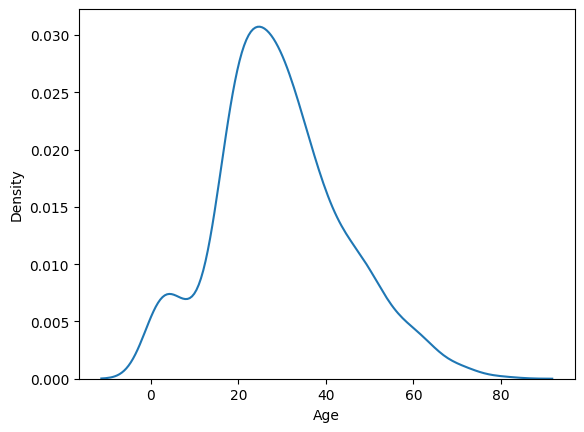

In [4]:
sns.kdeplot(x=df2['Age'])
plt.show()

1.EDA (univariate,multivariate)

In [5]:
print(df['Age'].mean())
print(df['Age'].min())
print(df['Age'].max())
print(df['Age'].skew())

29.69911764705882
0.42
80.0
0.38910778230082704


In [6]:
tips=sns.load_dataset('tips')
tips.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Axes: xlabel='tip', ylabel='total_bill'>

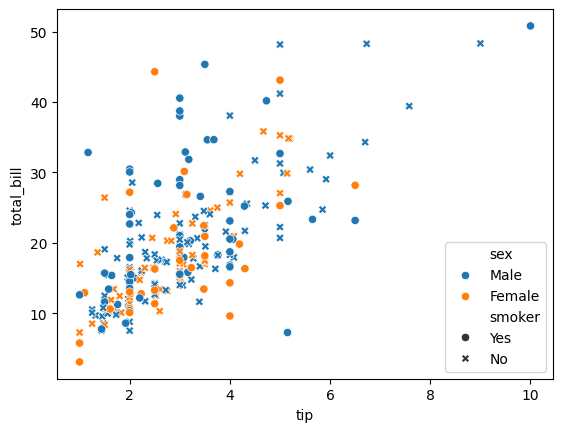

In [7]:
sns.scatterplot(x=tips['tip'],y=tips['total_bill'],hue=tips['sex'],style=tips['smoker'])

<Axes: xlabel='Survived', ylabel='Age'>

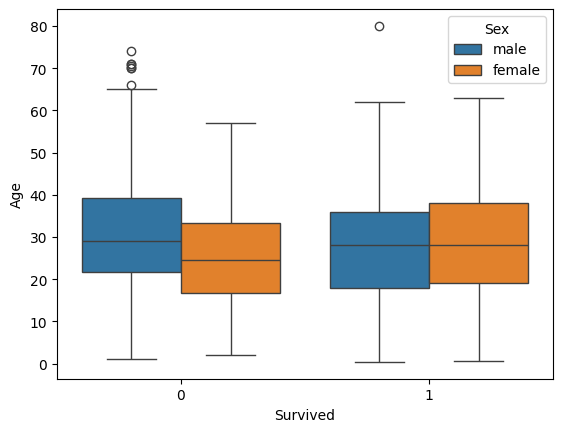

In [8]:
sns.boxplot(x=df['Survived'],y=df['Age'],hue=df['Sex'])

2.standarization and normarlization

    Age     Fare
0  22.0   7.2500
1  38.0  71.2833
2  26.0   7.9250
3  35.0  53.1000
4  35.0   8.0500
        Age      Fare
0 -0.565736 -0.502445
1  0.663861  0.786845
2 -0.258337 -0.488854
3  0.433312  0.420730
4  0.433312 -0.486337


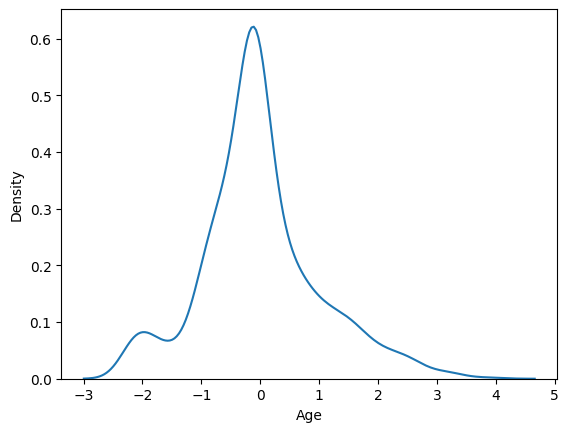

In [9]:
from sklearn.preprocessing import StandardScaler

df=pd.read_csv('train.csv')
featuer=['Age','Fare']

df_before=df[featuer].copy()

df[featuer]=df[featuer].fillna(df[featuer].median())

std=StandardScaler()

df[featuer]=std.fit_transform(df[featuer])


print(df_before.head())
print(df[featuer].head())

sns.kdeplot(x=df['Age'])
plt.show()



    Age     Fare
0  22.0   7.2500
1  38.0  71.2833
2  26.0   7.9250
3  35.0  53.1000
4  35.0   8.0500
        Age      Fare
0  0.949757  0.312988
1  0.470417  0.882444
2  0.956551  0.291564
3  0.550338  0.834942
4  0.974555  0.224148


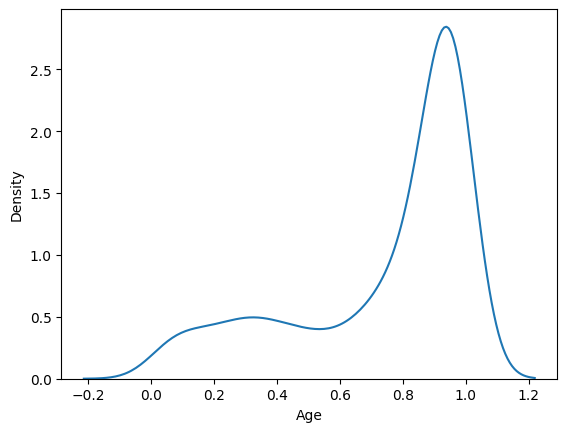

In [10]:

from sklearn.preprocessing import Normalizer

df=pd.read_csv('train.csv')
featuer=['Age','Fare']


df[featuer]=df[featuer].fillna(df[featuer].median())

df_before=df[featuer].copy()

normalization=Normalizer()


df[featuer]=normalization.fit_transform(df[featuer])

print(df_before.head())
print(df[featuer].head())

sns.kdeplot(x=df['Age'])
plt.show()

3_ordinal and onehot


In [11]:
from sklearn.preprocessing import OrdinalEncoder

df=pd.read_csv('train.csv')
feature=['Sex','Embarked']
print(df[feature])

df[feature]=df[feature].fillna('missing')

ord=OrdinalEncoder()

df[feature]=ord.fit_transform(df[feature])

print(df[feature].head())

        Sex Embarked
0      male        S
1    female        C
2    female        S
3    female        S
4      male        S
..      ...      ...
886    male        S
887  female        S
888  female        S
889    male        C
890    male        Q

[891 rows x 2 columns]
   Sex  Embarked
0  1.0       2.0
1  0.0       0.0
2  0.0       2.0
3  0.0       2.0
4  1.0       2.0


In [12]:
from sklearn.preprocessing import OneHotEncoder
df=pd.read_csv('train.csv')
feature=['Sex','Embarked']
print(df[feature])

df[feature].fillna('missing')

ohe=OneHotEncoder(sparse_output=False,drop=None)

encoded=ohe.fit_transform(df[feature])

encoded_df=pd.DataFrame(encoded,columns=ohe.get_feature_names_out(feature))

print(encoded_df)

        Sex Embarked
0      male        S
1    female        C
2    female        S
3    female        S
4      male        S
..      ...      ...
886    male        S
887  female        S
888  female        S
889    male        C
890    male        Q

[891 rows x 2 columns]
     Sex_female  Sex_male  Embarked_C  Embarked_Q  Embarked_S  Embarked_nan
0           0.0       1.0         0.0         0.0         1.0           0.0
1           1.0       0.0         1.0         0.0         0.0           0.0
2           1.0       0.0         0.0         0.0         1.0           0.0
3           1.0       0.0         0.0         0.0         1.0           0.0
4           0.0       1.0         0.0         0.0         1.0           0.0
..          ...       ...         ...         ...         ...           ...
886         0.0       1.0         0.0         0.0         1.0           0.0
887         1.0       0.0         0.0         0.0         1.0           0.0
888         1.0       0.0         0.0   

4_Column Transformer

In [13]:
import pandas as pd

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

df=pd.read_csv('train.csv')
df

numeric=['Age','Fare']
categorical=['Sex','Embarked']

x=df.drop('Survived',axis=1)
y=df['Survived']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

numeric_transformer=Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='mean')),
    ('scaler',StandardScaler())
])

categorical_transformer=Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('ohe',OneHotEncoder(handle_unknown='ignore'))
])

prepocessor=ColumnTransformer(transformers=[
    ('num',numeric_transformer,numeric),
    ('cate',categorical_transformer,categorical)
])

Pipeline=Pipeline(steps=[
    ('prepocessor',prepocessor)
])

x_train_transform=Pipeline.fit_transform(x_train)
x_test_tranform=Pipeline.fit_transform(x_test)

print(x_train_transform.shape)
print(x_test_tranform.shape)



(712, 7)
(179, 7)


5_function and Power transformer 

In [14]:
import numpy as np
from sklearn.preprocessing import FunctionTransformer

log_transformer=FunctionTransformer(np.log1p,inverse_func=np.expm1,validate=True)

data=np.array([[1],[2],[3],[10]])
transformed1=log_transformer.fit_transform(data)

print("orignal data:\n",data)
print("after tranform:",transformed1)


orignal data:
 [[ 1]
 [ 2]
 [ 3]
 [10]]
after tranform: [[0.69314718]
 [1.09861229]
 [1.38629436]
 [2.39789527]]


In [15]:
from sklearn.preprocessing import PowerTransformer

data=np.array([[1],[2],[3],[100]])

pt=PowerTransformer(method='yeo-johnson')
transformed=pt.fit_transform(data)

print("orignal:\n",data.ravel())
print("after power:",transformed.ravel())


orignal:
 [  1   2   3 100]
after power: [-1.13460112 -0.42603648 -0.03004481  1.59068241]


6_Binnig and Binarization

   Age  Bin_num     Category
0    5        0        Child
1   12        0        Child
2   17        0        Child
3   24        1        Young
4   35        2  Middle-aged
5   45        2  Middle-aged
6   60        3       Senior


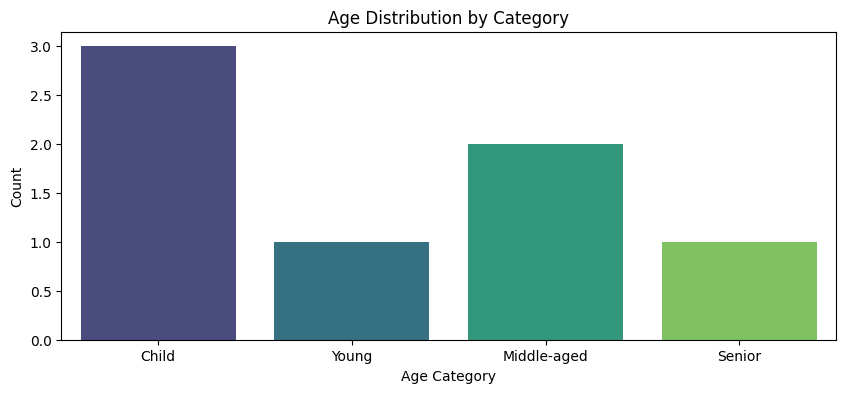

In [49]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import KBinsDiscretizer

ages=np.array([5, 12, 17, 24, 35, 45, 60]).reshape(-1,1)

binnig=KBinsDiscretizer(n_bins=4,encode='ordinal',strategy='uniform')

age_binned=binnig.fit_transform(ages)

df=pd.DataFrame({
    'Age':ages.flatten(),
    'Bin_num':age_binned.flatten().astype(int)
})

labels = ["Child", "Young", "Middle-aged", "Senior"]

df["Category"] = df['Bin_num'].apply(lambda x: labels[x])


print(df)

plt.figure(figsize=(10,4))
sns.countplot(x='Category', data=df, hue='Category', palette="viridis", legend=False)
plt.title("Age Distribution by Category")
plt.xlabel("Age Category")
plt.ylabel("Count")
plt.show()


In [17]:
from sklearn.preprocessing import Binarizer

income=np.array([[2000],[5000],[12000],[18000]])

binarize=Binarizer(threshold=10000)

income_binary=binarize.fit_transform(income)

df=pd.DataFrame({'income':income.flatten(),'income_binary':income_binary.flatten()})

print(df)


   income  income_binary
0    2000              0
1    5000              0
2   12000              1
3   18000              1


7_Hnadling date and time

In [18]:
import pandas as pd

data = {"Date": ["2025-08-16 09:30:00", "2025-08-17 14:45:00", "2025-08-18 20:10:00"]}
df = pd.DataFrame(data)

df['Date']=pd.to_datetime(df["Date"])

print(df.dtypes)


Date    datetime64[ns]
dtype: object


In [19]:
# extract
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Day"] = df["Date"].dt.day
df["Hour"] = df["Date"].dt.hour
df["Day_Name"] = df["Date"].dt.day_name()

print(df)


                 Date  Year  Month  Day  Hour  Day_Name
0 2025-08-16 09:30:00  2025      8   16     9  Saturday
1 2025-08-17 14:45:00  2025      8   17    14    Sunday
2 2025-08-18 20:10:00  2025      8   18    20    Monday


In [20]:
# difference

df["next_day"]=df["Date"].shift(-1)
df["diff"]=df["next_day"]-df["Date"]

print(df[["Date","next_day","diff"]])

                 Date            next_day            diff
0 2025-08-16 09:30:00 2025-08-17 14:45:00 1 days 05:15:00
1 2025-08-17 14:45:00 2025-08-18 20:10:00 1 days 05:25:00
2 2025-08-18 20:10:00                 NaT             NaT


In [21]:
#filltering

mask = df["Date"] > "2025-08-17"
print(df[mask])


                 Date  Year  Month  Day  Hour Day_Name            next_day  \
1 2025-08-17 14:45:00  2025      8   17    14   Sunday 2025-08-18 20:10:00   
2 2025-08-18 20:10:00  2025      8   18    20   Monday                 NaT   

             diff  
1 1 days 05:25:00  
2             NaT  


In [22]:
# Sample Time Series
rng = pd.date_range("2025-08-01", periods=10, freq="D")
ts = pd.Series(range(10), index=rng)

# Resample by week (sum)
print(ts.resample("W").sum())


2025-08-03     3
2025-08-10    42
Freq: W-SUN, dtype: int64


8_HANDLE MISSING DATA(numerical,categorical)

1. Numerical

In [23]:
import pandas as pd

df = pd.DataFrame({
    "Name": ["A", "B", "C", "D"],
    "Age": [25, None, 30, None],
    "City": ["Delhi", "Mumbai", None, "Kolkata"]
})

print(df.isnull().sum())
print(df.info())



Name    0
Age     2
City    1
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    4 non-null      object 
 1   Age     2 non-null      float64
 2   City    3 non-null      object 
dtypes: float64(1), object(2)
memory usage: 228.0+ bytes
None


In [24]:
# print(df.dropna(inplace=True))
# print(df.dropna(axis=1,inplace=True))


In [25]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Age'] = df['Age'].fillna(df['Age'].mode()[0])
df


,Name,Age,City
0,A,25.0,Delhi
1,B,27.5,Mumbai
2,C,30.0,None
3,D,27.5,Kolkata


In [26]:
from sklearn.impute import SimpleImputer
import numpy as np

imputer=SimpleImputer(strategy='mean')
df[['Age']]=imputer.fit_transform(df[['Age']])
df

,Name,Age,City
0,A,25.0,Delhi
1,B,27.5,Mumbai
2,C,30.0,None
3,D,27.5,Kolkata


2. Categorical

In [27]:
df['City'] = df['City'].fillna(df['City'].mode()[0])
df

,Name,Age,City
0,A,25.0,Delhi
1,B,27.5,Mumbai
2,C,30.0,Delhi
3,D,27.5,Kolkata


In [28]:
imputer=SimpleImputer(strategy='most_frequent')
df[['City']]=imputer.fit_transform(df[['City']])
df

,Name,Age,City
0,A,25.0,Delhi
1,B,27.5,Mumbai
2,C,30.0,Delhi
3,D,27.5,Kolkata


3. custom fill

In [29]:
df["City"] = df["City"].fillna("Unknown")

df

,Name,Age,City
0,A,25.0,Delhi
1,B,27.5,Mumbai
2,C,30.0,Delhi
3,D,27.5,Kolkata


4. KNNImputer

In [30]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=3)
df[["Age"]] = imputer.fit_transform(df[["Age"]])
df

,Name,Age,City
0,A,25.0,Delhi
1,B,27.5,Mumbai
2,C,30.0,Delhi
3,D,27.5,Kolkata


5. Flag missin value

In [31]:
df['City_missing']=df['City'].isnull().astype(int)
df['Age_missing']=df['Age'].isnull().astype(int)
df

,Name,Age,City,City_missing,Age_missing
0,A,25.0,Delhi,0,0
1,B,27.5,Mumbai,0,0
2,C,30.0,Delhi,0,0
3,D,27.5,Kolkata,0,0


8_ KNNIMPUTER

In [32]:
import numpy as np
import pandas as pd

from sklearn.impute import KNNImputer,SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

df=pd.read_csv('train.csv')[['Age','Pclass','Fare','Survived']]
df.head()

,Age,Pclass,Fare,Survived
0,22.0,3,7.2500,0
1,38.0,1,71.2833,1
2,26.0,3,7.9250,1
3,35.0,1,53.1000,1
4,35.0,3,8.0500,0


In [33]:
df.isnull().mean()*100

Age         19.86532
Pclass       0.00000
Fare         0.00000
Survived     0.00000
dtype: float64

In [34]:
x=df.drop(columns=['Survived'])
y=df['Survived']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

x_train.head()

,Age,Pclass,Fare
140,NaN,3,15.2458
439,31.0,2,10.5000
817,31.0,2,37.0042
378,20.0,3,4.0125
491,21.0,3,7.2500


In [35]:
knn = KNNImputer(n_neighbors=3,weights='distance')

X_train_trf = knn.fit_transform(x_train)
X_test_trf = knn.transform(x_test)

lr = LogisticRegression()

lr.fit(X_train_trf,y_train)

y_pred = lr.predict(X_test_trf)

accuracy_score(y_test,y_pred)

0.7318435754189944

In [36]:
si = SimpleImputer()

X_train_trf2 = si.fit_transform(x_train)
X_test_trf2 = si.transform(x_test)

lr = LogisticRegression()

lr.fit(X_train_trf2,y_train)

y_pred2 = lr.predict(X_test_trf2)

accuracy_score(y_test,y_pred2)

0.7318435754189944

9_OUTLIERS

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns

df=pd.read_csv('weight-height.csv')
print(df)

print(df.shape)

print(df.describe())

      Gender     Height      Weight
0       Male  73.847017  241.893563
1       Male  68.781904  162.310473
2       Male  74.110105  212.740856
3       Male  71.730978  220.042470
4       Male  69.881796  206.349801
...      ...        ...         ...
9995  Female  66.172652  136.777454
9996  Female  67.067155  170.867906
9997  Female  63.867992  128.475319
9998  Female  69.034243  163.852461
9999  Female  61.944246  113.649103

[10000 rows x 3 columns]
(10000, 3)
             Height        Weight
count  10000.000000  10000.000000
mean      66.367560    161.440357
std        3.847528     32.108439
min       54.263133     64.700127
25%       63.505620    135.818051
50%       66.318070    161.212928
75%       69.174262    187.169525
max       78.998742    269.989699


<Axes: xlabel='Height', ylabel='Density'>

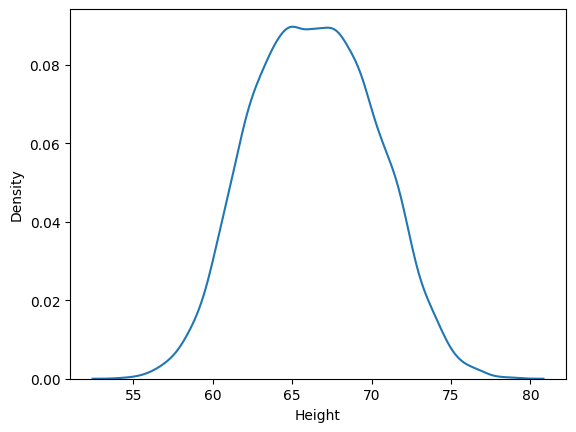

In [38]:
sns.kdeplot(df['Height'])

<Axes: ylabel='Height'>

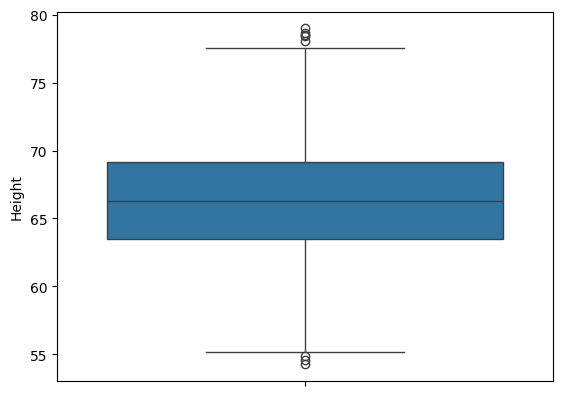

In [39]:
sns.boxplot(df['Height'])

In [40]:
# trimming

upper_limit=df['Height'].quantile(0.99)
print(upper_limit)

lower_limit=df['Height'].quantile(0.01)
print(lower_limit)


new_df=df[(df['Height']<=74.78) & (df['Height']>=58.13)]

new_df['Height'].describe()

74.7857900583366
58.13441158671655


count    9799.000000
mean       66.363507
std         3.644267
min        58.134496
25%        63.577147
50%        66.317899
75%        69.119859
max        74.767447
Name: Height, dtype: float64

<Axes: xlabel='Height', ylabel='Density'>

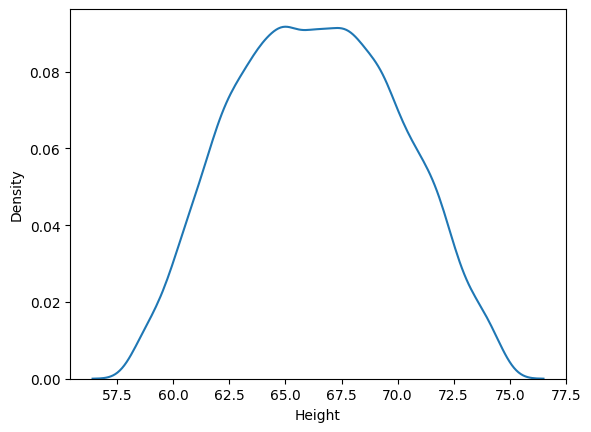

In [41]:
sns.kdeplot(new_df['Height'])

<Axes: ylabel='Height'>

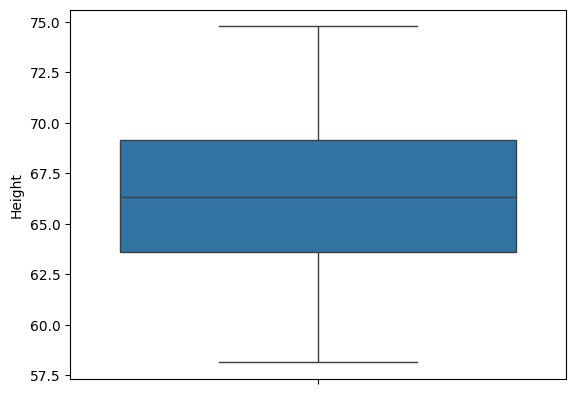

In [42]:
sns.boxplot(new_df['Height'])

In [43]:
# caping

df['Height']=np.where(
    df['Height']>=upper_limit,
    upper_limit,
    np.where(df['Height']<=lower_limit,
    lower_limit,
    df['Height'])
)

print(df.shape)

print(df['Height'].describe())


(10000, 3)
count    10000.000000
mean        66.366281
std          3.795717
min         58.134412
25%         63.505620
50%         66.318070
75%         69.174262
max         74.785790
Name: Height, dtype: float64


<Axes: xlabel='Height', ylabel='Density'>

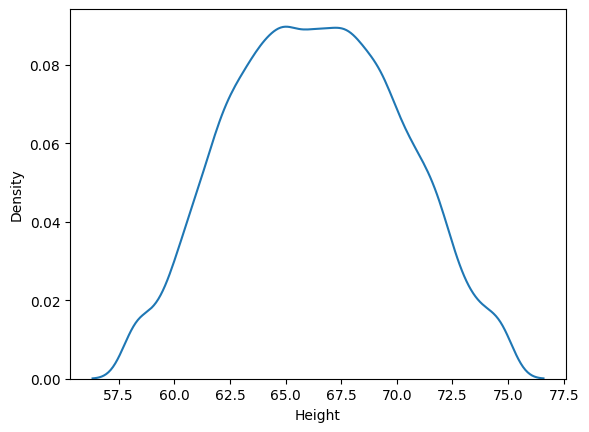

In [44]:
sns.kdeplot(df['Height'])

<Axes: ylabel='Height'>

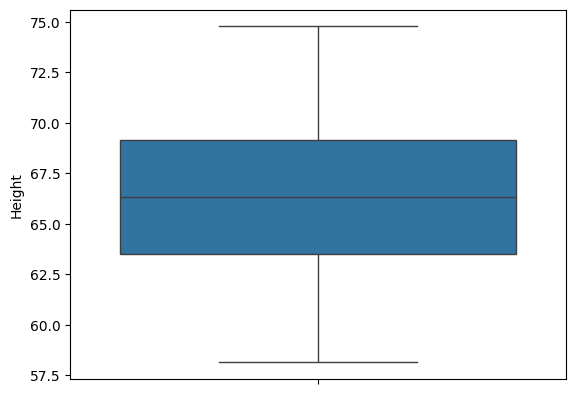

In [45]:
sns.boxplot(df['Height'])

10_PCA

In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

df=pd.read_csv('train.csv')

X = df[['Pclass', 'Sex', 'Age', 'Fare', 'Embarked']]
y = df['Survived']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

numeric_features = ['Age', 'Fare', 'Pclass']
categorical_features = ['Sex', 'Embarked']

numeric_transformer=Pipeline(steps=[
    ("imputer",SimpleImputer(strategy='median')),
    ("scaler",StandardScaler())
])

categorical_transformer=Pipeline(steps=[
    ("imputer",SimpleImputer(strategy='most_frequent')),
    ("onehot",OneHotEncoder(handle_unknown='ignore'))
])


preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ])

pca=PCA(n_components=2)

pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
     ("pca", pca)
     ])

X_pca = pipeline.fit_transform(X)

print("explained variance ratio:",pca.explained_variance_ratio_)

df_pca = pd.DataFrame(X_pca, columns=["PCA1", "PCA2"])
df_pca["Survived"] = y

print(df_pca.head())


explained variance ratio: [0.44263828 0.2437016 ]
       PCA1      PCA2  Survived
0  1.161195 -0.074852         0
1 -1.997014 -0.167372         1
2  0.901283 -0.139797         1
3 -1.540569 -0.053716         1
4  0.756698  0.764915         0


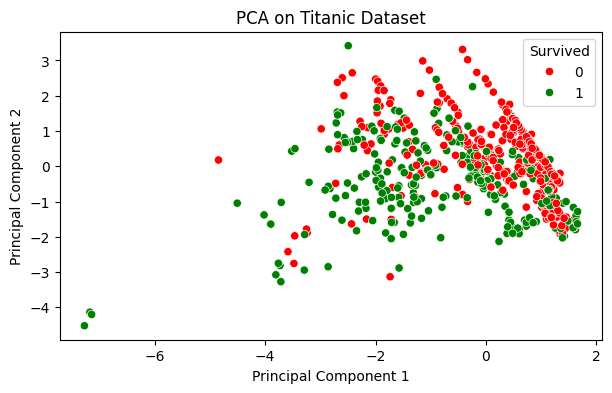

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7,4))
sns.scatterplot(x='PCA1',y='PCA2',hue='Survived',palette={0:'red',1:'green'},data=df_pca)
plt.title("PCA on Titanic Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title='Survived')
plt.show()
